<a href="https://colab.research.google.com/github/mohansaidinesh/Language-Detection/blob/main/BinaryBrains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**LANGUAGE DETECTION**

Language detection refers to the process of automatically identifying the language of a given text or document. This is an important task in natural language processing and is used in many applications, such as language translation, content filtering, and search engines.There are several techniques used for language detection, including


*   Built in Packages
*   Machine learning algorithms





##**Built-in Package:** 


Many programming languages provide built-in packages for language detection. For example, in Python, the langdetect package can be used to detect the language of text. This package uses n-grams and a Bayesian classifier to detect the language. It provides high accuracy and supports over 55 languages. 

1. **LangDetect** : 
This library is the direct port of Google’s language-detection library from Java to Python and can recognize over 50 languages

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9708a63d5d3f863820e3b8963e7f2c2312cc01e674719199ba1ae31294ee84cc
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
from langdetect import detect, detect_langs
def language_detection(text, method = "single"):
  if(method.lower() != "single"):
    result = detect_langs(text)
  else:
    result = detect(text)
  return result

In [ ]:
text = """This library is the direct port of Google's language-detection library from Java to Python. Elle est vraiment éfficace dans la détection de langue."""
print(language_detection(text))
print(language_detection(text,'all languages'))

en
[en:0.7142827346324744, fr:0.28571720156579056]


**CONCLUSION** : 

There are several packages available some of them are Spacy-langdetect,  fastText, gcld3 and textblob there are also some drawbacks to relying solely on these packages for language detection: Limited language support, Lack of customization, Performance limitations and Quality concerns

##**Machine learning algorithms**

Creating your own language model and using it to detect the language. This method is more time-consuming and requires more resources than using a built-in package, but it provides more control over the language detection process.This step involves 3 ways 


*   Statistical Analysis

*   Machine Learning algorithms
*   Deep Learning




##**Statistical analysis**

Statistical analysis is one of the techniques used for language detection. It involves analyzing the frequency of characters, words, and other features in a given text to identify the language. One common statistical analysis technique for language detection is n-gram analysis. This involves breaking the text into sequences of n characters or words and comparing these sequences to known language models to identify the language.

 Visualising some n-grams of different lengths

In [ ]:
text = "This is a test text"
n = 3
text_len = len(text)
num_ngrams = text_len - n + 1
print(f"The text is {text_len} characters long and will fit {num_ngrams} n-grams of length {n}.")
for p in range(num_ngrams) :
            print(f"{p}: {text[p:p+n]}")


The text is 19 characters long and will fit 17 n-grams of length 3.
0: Thi
1: his
2: is 
3: s i
4:  is
5: is 
6: s a
7:  a 
8: a t
9:  te
10: tes
11: est
12: st 
13: t t
14:  te
15: tex
16: ext


Build an N-Gram Extractor


In [ ]:
import typing
def extract_xgrams(text: str, n_vals: typing.List[int]) -> typing.List[str]:
    xgrams = []
    for n in n_vals:
        if n < len(text):
            for i in range(len(text) - n + 1) :
                ng = text[i:i+n]
                xgrams.append(ng)
    return xgrams
text = "I was taught that the way of progress was neither swift nor easy.".lower()
xgrams = extract_xgrams(text, n_vals=range(1,4))
print(xgrams)

['i', ' ', 'w', 'a', 's', ' ', 't', 'a', 'u', 'g', 'h', 't', ' ', 't', 'h', 'a', 't', ' ', 't', 'h', 'e', ' ', 'w', 'a', 'y', ' ', 'o', 'f', ' ', 'p', 'r', 'o', 'g', 'r', 'e', 's', 's', ' ', 'w', 'a', 's', ' ', 'n', 'e', 'i', 't', 'h', 'e', 'r', ' ', 's', 'w', 'i', 'f', 't', ' ', 'n', 'o', 'r', ' ', 'e', 'a', 's', 'y', '.', 'i ', ' w', 'wa', 'as', 's ', ' t', 'ta', 'au', 'ug', 'gh', 'ht', 't ', ' t', 'th', 'ha', 'at', 't ', ' t', 'th', 'he', 'e ', ' w', 'wa', 'ay', 'y ', ' o', 'of', 'f ', ' p', 'pr', 'ro', 'og', 'gr', 're', 'es', 'ss', 's ', ' w', 'wa', 'as', 's ', ' n', 'ne', 'ei', 'it', 'th', 'he', 'er', 'r ', ' s', 'sw', 'wi', 'if', 'ft', 't ', ' n', 'no', 'or', 'r ', ' e', 'ea', 'as', 'sy', 'y.', 'i w', ' wa', 'was', 'as ', 's t', ' ta', 'tau', 'aug', 'ugh', 'ght', 'ht ', 't t', ' th', 'tha', 'hat', 'at ', 't t', ' th', 'the', 'he ', 'e w', ' wa', 'way', 'ay ', 'y o', ' of', 'of ', 'f p', ' pr', 'pro', 'rog', 'ogr', 'gre', 'res', 'ess', 'ss ', 's w', ' wa', 'was', 'as ', 's n', ' n

 Function for Building a Language Model

In [ ]:
import collections
def build_model(text: str, n_vals: typing.List[int]) -> typing.Dict[str, int]:
    model = collections.Counter(extract_xgrams(text, n_vals))  
    num_ngrams = sum(model.values())
    for ng in model:
        model[ng] = model[ng] / num_ngrams
    return model
test_model = build_model(text, n_vals=range(1,4))
print({k: v for k, v in sorted(test_model.items(), key=lambda item: item[1], reverse=True)})

{' ': 0.0625, 't': 0.036458333333333336, 'a': 0.03125, 's': 0.03125, 'e': 0.026041666666666668, 'w': 0.020833333333333332, 'h': 0.020833333333333332, 'r': 0.020833333333333332, 'i': 0.015625, 'o': 0.015625, ' w': 0.015625, 'wa': 0.015625, 'as': 0.015625, 's ': 0.015625, ' t': 0.015625, 't ': 0.015625, 'th': 0.015625, ' wa': 0.015625, 'g': 0.010416666666666666, 'y': 0.010416666666666666, 'f': 0.010416666666666666, 'n': 0.010416666666666666, 'he': 0.010416666666666666, ' n': 0.010416666666666666, 'r ': 0.010416666666666666, 'was': 0.010416666666666666, 'as ': 0.010416666666666666, 't t': 0.010416666666666666, ' th': 0.010416666666666666, 'the': 0.010416666666666666, 'u': 0.005208333333333333, 'p': 0.005208333333333333, '.': 0.005208333333333333, 'i ': 0.005208333333333333, 'ta': 0.005208333333333333, 'au': 0.005208333333333333, 'ug': 0.005208333333333333, 'gh': 0.005208333333333333, 'ht': 0.005208333333333333, 'ha': 0.005208333333333333, 'at': 0.005208333333333333, 'e ': 0.00520833333333

Install NLTK and Download Our Text Data

In [ ]:
import nltk
nltk.download('udhr') 
from nltk.corpus import udhr 
print(f"There are {len(udhr.fileids())} files with the following ids: {udhr.fileids()}")

There are 310 files with the following ids: ['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8', 'Basque_Euskara-Latin1', 'Batonu_Bariba-UTF8', 'Belorus_Belaruski-Cyrillic', 'Belorus_Belaruski-UTF8', 'Bemba-Latin1', 'Bengali-UTF8', 'Beti-UTF8', 'Bichelamar-Latin1', 'Bikol_Bicolano-Latin1', 'Bora-Latin1', 'Bosnian_Bosanski-Cyrillic', 'Bosnian_Bosanski-Latin2', 'Bosnian_Bosanski-UTF8', 'Breton-Latin1', 'Bugisnese-Latin1', 'Bulgarian_Balgarski-Cyrillic', 'Bulgarian_Balgarski-UTF8', 'Cakchiquel-Latin1', 'Campa_Pajonalino-Latin1', 'Candoshi-Shapra-Latin1', 'Caquinte-Latin

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


In [ ]:
languages = ['english', 'german', 'dutch', 'french', 'italian', 'spanish','turkish','swaheli']
language_ids = ['English-Latin1', 'German_Deutsch-Latin1', 'Dutch_Nederlands-Latin1', 'French_Francais-Latin1', 'Italian_Italiano-Latin1', 'Spanish_Espanol-Latin1', 'Turkish_Turkce-Turkish','Swaheli-Latin1'] 
def retrieve_fileid_by_first_letter(fileids, letter):
    return [id for id in fileids if id.lower().startswith(letter.lower())]
print(f"Fileids beginning with 'R': {retrieve_fileid_by_first_letter(udhr.fileids(), letter='R')}")
languages += []
language_ids += []

Fileids beginning with 'R': ['Rarotongan_MaoriCookIslands-Latin1', 'Rhaeto-Romance_Rumantsch-Latin1', 'Romani-Latin1', 'Romani-UTF8', 'Romanian-Latin2', 'Romanian_Romana-Latin2', 'Rukonzo_Konjo-Latin1', 'Rundi_Kirundi-Latin1', 'Runyankore-rukiga_Nkore-kiga-Latin1', 'Russian-Cyrillic', 'Russian-UTF8', 'Russian_Russky-Cyrillic', 'Russian_Russky-UTF8']


In [ ]:
raw_texts = {language: udhr.raw(language_id) for language, language_id in zip(languages, language_ids)}
print(raw_texts['english'][:1000])
models = {language: build_model(text=raw_texts[language], n_vals=range(1,4)) for language in languages}
print(models['german'])

Universal Declaration of Human Rights
Preamble
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world, 

Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people, 

Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law, 

Whereas it is essential to promote the development of friendly relations between nations, 

Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in

Determine the language for a given piece of text

 cosine similarity


 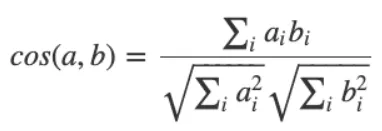

In [ ]:
import math
def calculate_cosine(a: typing.Dict[str, float], b: typing.Dict[str, float]) -> float:
    numerator = sum([a[k]*b[k] for k in a if k in b])
    denominator = (math.sqrt(sum([a[k]**2 for k in a])) * math.sqrt(sum([b[k]**2 for k in b])))
    return numerator / denominator

In [ ]:
def identify_language(
    text: str,
    language_models: typing.Dict[str, typing.Dict[str, float]],
    n_vals: typing.List[int]
    ) -> str:
    text_model = build_model(text, n_vals)
    language = ""
    max_c = 0
    for m in language_models:
        c = calculate_cosine(language_models[m], text_model)
        print(f'Language: {m}; similarity with test text: {c}')
        if c > max_c:
            max_c = c
            language = m
    return language
print(f"Test text: {text}")
print(f"Identified language: {identify_language(text, models, n_vals=range(1,4))}")

Test text: i was taught that the way of progress was neither swift nor easy.
Language: english; similarity with test text: 0.7812347488239613
Language: german; similarity with test text: 0.6638235631734796
Language: dutch; similarity with test text: 0.6495872103674768
Language: french; similarity with test text: 0.7073331083503462
Language: italian; similarity with test text: 0.6635204671187273
Language: spanish; similarity with test text: 0.6811923819801172
Identified language: english


In [ ]:
tricky_text = "učili so me, da pot napredka ni ne hitra ne lahka."
print(f"Identified language: {identify_language(tricky_text, models, n_vals=range(1,4))}")

Language: english; similarity with test text: 0.7287873650203188
Language: german; similarity with test text: 0.6721847143945305
Language: dutch; similarity with test text: 0.6794130641102911
Language: french; similarity with test text: 0.7395592659566902
Language: italian; similarity with test text: 0.7673665450525412
Language: spanish; similarity with test text: 0.7588017776235897
Identified language: italian


Test our language detector on different languages


In [ ]:
t = "mij werd geleerd dat de weg van vooruitgang noch snel noch gemakkelijk is."  
print(identify_language(t, models, n_vals=range(1,4)))

Language: english; similarity with test text: 0.743304897646558
Language: german; similarity with test text: 0.7733789879735117
Language: dutch; similarity with test text: 0.8097568576218539
Language: french; similarity with test text: 0.7323618842369076
Language: italian; similarity with test text: 0.7212678466299378
Language: spanish; similarity with test text: 0.7427977591261742
dutch


In [ ]:
t = "on m'a appris que la voie du progrès n'était ni rapide ni facile."  
print(identify_language(t, models, n_vals=range(1,4)))

Language: english; similarity with test text: 0.7514819875837305
Language: german; similarity with test text: 0.6773504878901836
Language: dutch; similarity with test text: 0.6909041495271637
Language: french; similarity with test text: 0.7928548637086018
Language: italian; similarity with test text: 0.7996222666110279
Language: spanish; similarity with test text: 0.7872339328264519
italian


In [ ]:
t = "me enseñaron que el camino hacia el progreso no es ni rápido ni fácil."
print(identify_language(t, models, n_vals=range(1,4)))

Language: english; similarity with test text: 0.7682120973467381
Language: german; similarity with test text: 0.7126741656089054
Language: dutch; similarity with test text: 0.7366143060084208
Language: french; similarity with test text: 0.7741780323907502
Language: italian; similarity with test text: 0.7987905532144752
Language: spanish; similarity with test text: 0.8130592752007245
spanish


In [ ]:
import nltk
from nltk.lm import MLE, Vocabulary
from nltk.lm.preprocessing import padded_everygram_pipeline

Accuracy of N-Gram Model

In [ ]:
n = 3
train_data, padded_vocab = padded_everygram_pipeline(n,models['german'])
model = MLE(n)
model.fit(train_data, padded_vocab)
test_data = [word for sent in models['german'] for word in sent]
test_vocab = Vocabulary(test_data)
perplexity = model.perplexity(test_data)
print(perplexity)

84.62920171213617


**CONCLUSION** : 
N-gram analysis can be used to detect the language of a variety of text, including web pages, social media posts, and email messages. The accuracy of language detection using n-gram analysis can be improved by using larger n-gram sizes, combining n-gram analysis with other statistical techniques or machine learning approaches, and using multiple language models to account for variations in dialect and writing styles.

##**Machine** **Learning**


###**Importing all the required libraries for Training the data set**


In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix


###**Read the CSV file**


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mohansaidinesh/LanguageDetection/main/dataset.csv")
print(data.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


###**Now split the data into training data as well as testing data**

In [ ]:
x = np.array(data["Text"])
y = np.array(data["language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###**Loading the Multinomial Naive Bayes model for training the model**

In [ ]:
model = MultinomialNB()


###**Traing the model over the training data**



In [ ]:
model.fit(X_train,y_train)

MultinomialNB()

###**predicting using the model over the x_test data**

In [ ]:
y_pred=model.predict(X_test)

###**Getting accuracy of the model over testing data**

In [ ]:
print("Accuracy of the model on testing data",model.score(X_test,y_test))


Accuracy of the model on testing data 0.95


###**confusion matrix for our model prediction and corresponding actual values**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  48,   0,   7,   0,   1,   0,   0,  48,   0,   0,   0,   0,
          0,   2,   0,   1,   0,   0,   0,   1,   0],
       [  0,   0, 109,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3,  94,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0, 110,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0,   0,  99,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

###**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       113
     Chinese       0.96      0.44      0.61       108
       Dutch       0.97      0.99      0.98       110
     English       0.73      1.00      0.84       102
    Estonian       0.98      0.96      0.97        98
      French       0.95      0.99      0.97       105
       Hindi       1.00      0.98      0.99       112
  Indonesian       1.00      0.97      0.99       102
    Japanese       0.61      0.87      0.72        90
      Korean       1.00      0.99      0.99        87
       Latin       0.99      0.89      0.94       103
     Persian       1.00      1.00      1.00       107
   Portugese       1.00      0.97      0.98        98
      Pushto       1.00      0.97      0.98       101
    Romanian       0.97      0.99      0.98        98
     Russian       0.98      1.00      0.99       110
     Spanish       0.98      1.00      0.99        95
     Swedish       1.00    

###**Testing the model performance by giving text manualy**

####**Test:1**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print("language is :",*output)

Enter a Text: இந்துப்
language is : Tamil


####**Test:2**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print("language is :",*output)

Enter a Text: hye who is this
language is : English


####**Test:3**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print("language is :",*output)

Enter a Text: एक छोटा हिंदी
language is : Hindi


####**Conclusion**:
  Language detection with 95% accuracy is a significant achievement in the field of natural language processing. With this level of accuracy, it is possible to classify text data with a high degree of confidence, enabling a wide range of applications from content filtering to personalized recommendations. However, it is important to recognize that language detection is still subject to challenges such as dialectal variations, code-switching, and low-resource languages. Further research and development are needed to overcome these obstacles and improve the accuracy of language detection even further, enabling more sophisticated and nuanced applications. Despite these challenges, language detection with 95% accuracy remains an impressive feat that has significant implications for the field of natural language processing and beyond.

##**Deep Learning**

Deep learning is a popular approach for language detection because it can automatically learn features from data and make accurate predictions based on those features. In the context of language detection, deep learning models can take in text input and output the language of the text.One common deep learning architecture used for language detection is the Convolutional Neural Network (CNN). CNNs can be trained on large datasets of text in different languages, and learn to detect patterns that are specific to each language. 

Imprt required libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

Load the dataset


In [ ]:
data_df = pd.read_csv("https://raw.githubusercontent.com/mohansaidinesh/LanguageDetection/main/dataset.csv")

 Preprocessing the dataset


In [ ]:
X = np.array(data_df['Text'])
labels = np.array(data_df['language'])

Convert labels to integers


In [ ]:
classes = np.unique(labels)
label_dict = dict(zip(classes, range(len(classes))))
y = np.array([label_dict[label] for label in labels])

 Split the dataset into training and testing


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Convert sentences to vectors using bag-of-words approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train.sort_indices()
X_test.sort_indices()

 Build the neural network


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.01),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               30501632  
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 22)                2838      
                                                                 
Total params: 30,504,470
Trainable params: 30,504,470
Non-trainable params: 0
_________________________________________________________________


 Train the model


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train, y_train,
          batch_size=32,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/5
550/550 [==============================] - 205s 369ms/step - loss: 0.2400 - accuracy: 0.9438 - val_loss: 0.1408 - val_accuracy: 0.9666
Epoch 2/5
550/550 [==============================] - 204s 371ms/step - loss: 0.0655 - accuracy: 0.9897 - val_loss: 0.1647 - val_accuracy: 0.9614
Epoch 3/5
550/550 [==============================] - 204s 371ms/step - loss: 0.0316 - accuracy: 0.9947 - val_loss: 0.1765 - val_accuracy: 0.9602
Epoch 4/5
550/550 [==============================] - 217s 394ms/step - loss: 0.0143 - accuracy: 0.9971 - val_loss: 0.1937 - val_accuracy: 0.9605
Epoch 5/5
550/550 [==============================] - 190s 345ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.2188 - val_accuracy: 0.9630


Evaluate the model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21875984966754913
Test accuracy: 0.9629545211791992


Predict language of a sentence

In [ ]:
def predict_language(sentence):
    sentence_vector = vectorizer.transform([sentence])
    prediction = model.predict(sentence_vector)
    predicted_label = classes[np.argmax(prediction)]
    return predicted_label

**Test : 01**

In [ ]:
sentence = "Je suis un étudiant en informatique."
language = predict_language(sentence)
print(language)

1/1 [==============================] - 0s 160ms/step
French


**Test : 02**

In [ ]:
sentence = "தமிழர்களினதும் தமிழ் பேசும் பலரின் தாய்மொழி ஆகும்"
language = predict_language(sentence)
print(language)

1/1 [==============================] - 0s 30ms/step
Tamil


**CONCLUSION** : 

The convolutional neural network (CNN) achieves 96% accuracy for language detection, it indicates that the model has learned to effectively recognize the patterns and features in different languages, and can accurately distinguish between them. This is a significant achievement, as language detection can be a challenging task due to the many similarities between languages and the lack of clear boundaries between them.

**Overview** : 

Accuray of models:



*   N-Gram Modlel : 84%
*   Naive Bayes   : 95%
*   CNN Networks  : 96%

